## Heat equation:

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as sint

## Heat equation:

$u_t = c^2 u_{xx}$

In [3]:
# Define constants
c_2 = 1 # difussivity constant

# Length of the box/domain
L = 100

# Discretisation of the domain
N = 1000

# Define the step size
h = L/N

# Define x-axis

x = np.arange(-L/2, +L/2, h)

print(x.shape)

(1000,)


In [4]:
# Wavenumbers = spatial frequencies:

k_numbers = 2*np.pi*np.fft.fftfreq(len(x), d = h)

#print(N, len(x))
#print(k_numbers)

In [5]:
# Initial conditions

u_0 = np.zeros(len(x))

#print(u_0.shape)

# Replace zeroes with cos(4*pi*x/L), alpha should be 4*pi/L

u_0[int((L / 2 - L / 8)/h):int((L / 2 + L / 8)/h)]  = np.cos(4*np.pi*x[int((L / 2 - L / 8)/h):int((L / 2 + L / 8)/h)]/L)


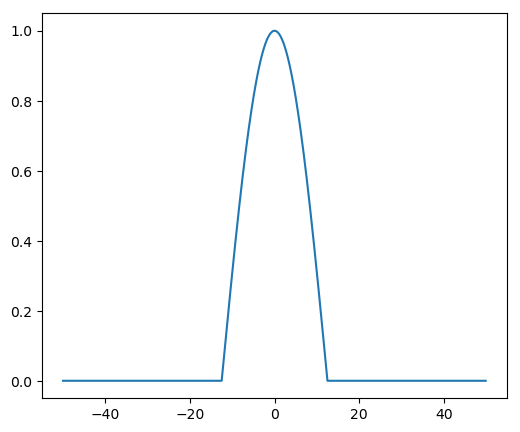

In [6]:
# Let's check with a plot of the ICs

plt.figure(figsize=(6, 5))

plt.plot(x, u_0)

plt.show()


In [7]:
# Fourier transform

u_0_fourier = np.fft.fft(u_0)

#print(u_0_fourier)

print(u_0.shape, u_0_fourier.shape)

(1000,) (1000,)


In [8]:
# Norm of Fourier transform

ampli_u_0_fourier = np.abs(u_0_fourier)/(u_0_fourier.size//2)

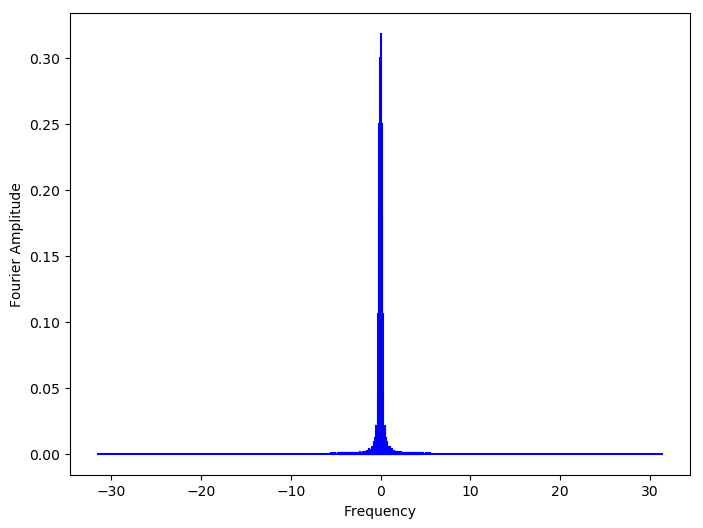

In [9]:
plt.figure(figsize = (8, 6))
plt.stem(k_numbers, ampli_u_0_fourier, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')

plt.show()

/var/folders/sw/g1jmwgb9161cw02pzv6xtvjw0000gn/T/ipykernel_4138/3167355534.py:2: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k_numbers, ampli_u_0_fourier, 'b', markerfmt=" ", basefmt="-b")


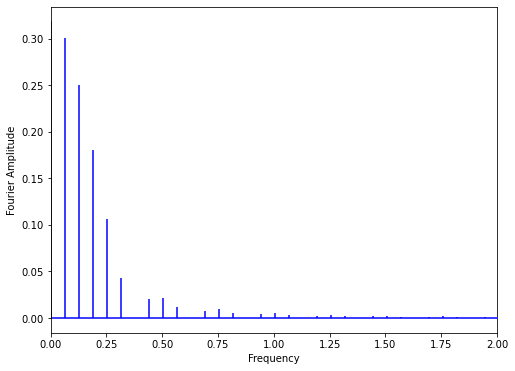

In [9]:
plt.figure(figsize = (8, 6))
plt.stem(k_numbers, ampli_u_0_fourier, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.xlim(0,2)
plt.show()

### Concatenate real and complex numbers


In [20]:
#print(u_0_fourier)

print(u_0_fourier[3])

print(u_0_fourier[3].real)
print(u_0_fourier[3].imag)

u_0_fourier_conc = np.concatenate((u_0_fourier.real, u_0_fourier.imag))

print(u_0_fourier_conc.shape)

(-90.03311260689838-1.2042077195159473e-11j)
-90.03311260689838
-1.2042077195159473e-11
(2000,)


### Time discretisation:

In [21]:
# Time step
t_step = 0.1

t = np.arange(0, 1, t_step)

print(t.shape)

(10,)


#print(k_numbers)

### Construct ODE (RHS of ODE)

In [28]:
# Function to get RHS

def RHS_ODE(u_0_fourier_conc, k_numbers):
    
    u_tilde = u_0_fourier_conc[:N] + (1j)*u_0_fourier_conc[N:]
    
    rhs_u_tilde = -(c_2**2)*(k_numbers**2)*u_tilde
    
    rhs_ode = np.concatenate((rhs_u_tilde.real, rhs_u_tilde.imag))
    
    return rhs_ode

In [29]:
print(RHS_ODE(u_0_fourier_conc, k_numbers).shape)

(2000,)


### k ODEs: solution

In [33]:
solution = sint.odeint(RHS_ODE, u_0_fourier_conc, t)

print(solution.shape)

(10, 2000)


### Reconstruct Complex solution:

In [34]:
u_solution = solution[:, :N] + (1j)*solution[:, N:]

print(u_solution.shape)

(10, 1000)


### Inverse Fourier transform of each u_solution

In [41]:
# For loop with k as index

inv_u_solution = np.zeros(u_solution.shape)

print(inv_u_solution.shape)

for k in range(len(t)):
    
    inv_u_solution[k, :] = np.fft.ifft(u_solution[k, :])
    


(10, 1000)


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == "__main__":


In [44]:
#print(inv_u_solution)

### Plotting the solution:

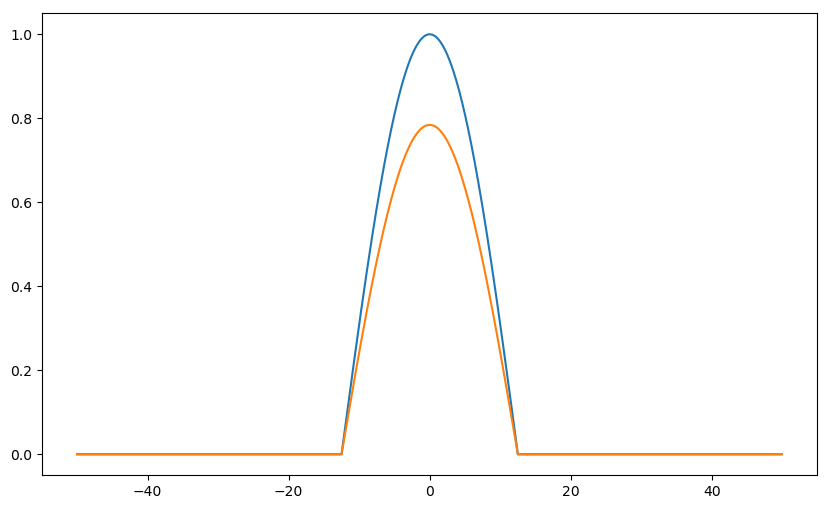

In [50]:
plt.figure(figsize= (10, 6))

plt.plot(x, inv_u_solution[0, :])

plt.plot(x, inv_u_solution[9, :])

plt.show()